******Getting and organising the Data******

In [1]:

import pandas as pd
from sklearn.datasets import fetch_20newsgroups

print("Libraries imported successfully.")

Libraries imported successfully.


******Fetch the Large Dataset******

In [2]:

print("Fetching the large '20 Newsgroups' dataset...")

newsgroups_data = fetch_20newsgroups(
    subset='all', 
    shuffle=True, 
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)

print(" Dataset fetched and loaded into memory.")

Fetching the large '20 Newsgroups' dataset...
 Dataset fetched and loaded into memory.


******Organize and Verify the Data******

In [3]:

print("Organizing the data into a structured table...")

df = pd.DataFrame({
    'text': newsgroups_data.data, 
    'category_id': newsgroups_data.target
})
df['category_name'] = df['category_id'].apply(lambda id: newsgroups_data.target_names[id])

print(" Data organized.")
print("-" * 50)
print(f"Total documents: {len(df)} | Total categories: {len(df['category_name'].unique())}")
print("\n--- Top 5 Rows of the Dataset ---")
display(df.head())

Organizing the data into a structured table...
 Data organized.
--------------------------------------------------
Total documents: 18846 | Total categories: 20

--- Top 5 Rows of the Dataset ---


,text,category_id,category_name
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


In [4]:
# Load and organize the 20 Newsgroups dataset into a structured table

print("Loading the 20 Newsgroups dataset and organizing into a structured table...")

# Fetching the dataset (keeping headers, footers, and quotes this time)
newsgroups_data = fetch_20newsgroups(
    subset='all', 
    shuffle=True, 
    random_state=42
)

# Create a DataFrame with text and category info
df = pd.DataFrame({
    'text': newsgroups_data.data, 
    'category_id': newsgroups_data.target
})
df['category_name'] = df['category_id'].apply(lambda id: newsgroups_data.target_names[id])

print("✅ Dataset successfully loaded and organized.")
print("-" * 50)
print(f"Total documents: {len(df)} | Total categories: {len(df['category_name'].unique())}")
display(df.head())


Loading the 20 Newsgroups dataset and organizing into a structured table...
✅ Dataset successfully loaded and organized.
--------------------------------------------------
Total documents: 18846 | Total categories: 20


,text,category_id,category_name
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware


******Data Exploration and Preprocessing******

Analyzing the distribution of documents across categories...


C:\Users\prave\AppData\Local\Temp\ipykernel_5820\3069945958.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category_name', order=df['category_name'].value_counts().index, palette='viridis')


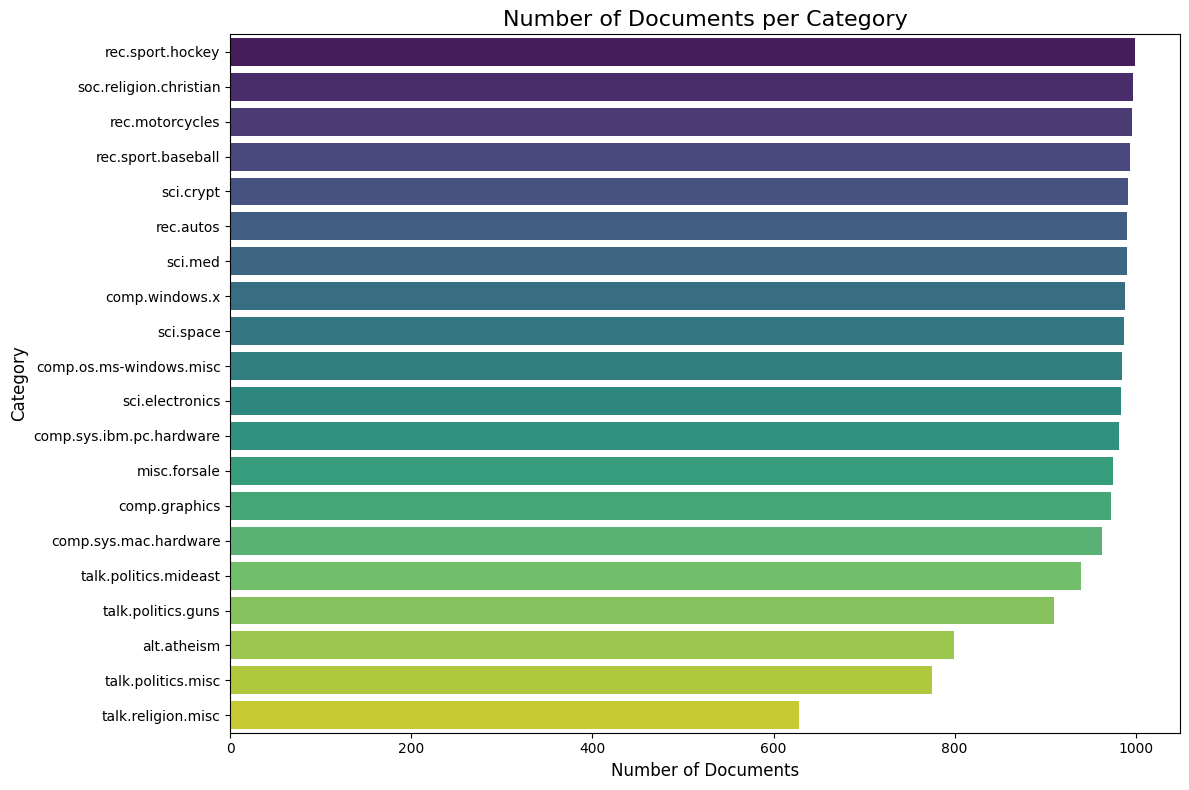

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Analyzing the distribution of documents across categories...")

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a count plot to visualize the distribution
sns.countplot(data=df, y='category_name', order=df['category_name'].value_counts().index, palette='viridis')

plt.title('Number of Documents per Category', fontsize=16)
plt.xlabel('Number of Documents', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

In [7]:
import nltk

print("Downloading NLTK resources (stopwords and wordnet)...")
nltk.download('stopwords')
nltk.download('wordnet')
print(" Downloads complete.")

 Downloads complete.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the tools we need
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the effective preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower().strip()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(lemmatized_tokens)

print("Applying preprocessing to all documents... (This may take a moment)")
# Apply the function to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)
print("✅ Preprocessing complete.")

# Display a sample to verify the result
print("\n--- Comparing original vs. cleaned text ---")
pd.set_option('display.max_colwidth', 400) # Widen the column display
display(df[['text', 'clean_text']].head())

Applying preprocessing to all documents... (This may take a moment)
✅ Preprocessing complete.

--- Comparing original vs. cleaned text ---


,text,clean_text
0,"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am bit puzzled too and a bit relieved. Howe...",mamatha devineni ratnam mrandrewcmuedu subject pen fan reaction organization post office carnegie mellon pittsburgh pa line nntppostinghost poandrewcmuedu sure bashers pen fan pretty confused lack kind post recent pen massacre devil actually bit puzzled bit relieved however going put end nonpittsburghers relief bit praise pen man killing devil worse thought jagr showed much better regular seas...
1,"From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which high-performance VLB video card?\nSummary: Seek recommendations for VLB video card\nNntp-Posting-Host: midway.ecn.uoknor.edu\nOrganization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA\nKeywords: orchid, stealth, vlb\nLines: 21\n\n My brother is in the market for a high-performance video card that...",mblawsonmidwayecnuoknoredu matthew b lawson subject highperformance vlb video card summary seek recommendation vlb video card nntppostinghost midwayecnuoknoredu organization engineering computer network university oklahoma norman ok usa keywords orchid stealth vlb line brother market highperformance video card support vesa local bus mb ram anyone suggestionsideas diamond stealth pro local bus ...
2,"From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject: Re: ARMENIA SAYS IT COULD SHOOT DOWN TURKISH PLANES (Henrik)\nLines: 95\nNntp-Posting-Host: viktoria.dsv.su.se\nReply-To: hilmi-er@dsv.su.se (Hilmi Eren)\nOrganization: Dept. of Computer and Systems Sciences, Stockholm University\n\n\n\n\n|>The student of ""regional killings"" alias Davidian (not the Davidian religios sect) writes:\n\n\n|>Greater A...",hilmierdsvsuse hilmi eren subject armenia say could shoot turkish plane henrik line nntppostinghost viktoriadsvsuse replyto hilmierdsvsuse hilmi eren organization dept computer system science stockholm university student regional killing alias davidian davidian religios sect writes greater armenia would stretch karabakh black sea mediterranean use term greater armenia use care finally said dre...
3,"From: guyd@austin.ibm.com (Guy Dawson)\nSubject: Re: IDE vs SCSI, DMA and detach\nOriginator: guyd@pal500.austin.ibm.com\nOrganization: IBM Austin\nLines: 60\n\n\nIn article <1993Apr19.034517.12820@julian.uwo.ca>, wlsmith@valve.heart.rri.uwo.ca (Wayne Smith) writes:\n> In article <RICHK.93Apr15075248@gozer.grebyn.com> richk@grebyn.com (Richard Krehbiel) writes:\n> >> Can anyone explain in ...",guydaustinibmcom guy dawson subject ide v scsi dma detach originator guydpalaustinibmcom organization ibm austin line article aprjulianuwoca wlsmithvalveheartrriuwoca wayne smith writes article richkaprgozergrebyncom richkgrebyncom richard krehbiel writes anyone explain fairly simple term get o might need scsi controler rather ide performance suffer much mb drive dont tape drive cdrom help wou...
4,"From: Alexander Samuel McDiarmid <am2o+@andrew.cmu.edu>\nSubject: driver ??\nOrganization: Sophomore, Mechanical Engineering, Carnegie Mellon, Pittsburgh, PA\nLines: 15\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n \n1) I have an old Jasmine drive which I cannot use with my new system.\n My understanding is that I have to upsate the driver with a more modern\none in order to gain compatability...",alexander samuel mcdiarmid amoandrewcmuedu subject driver organization sophomore mechanical engineering carnegie mellon pittsburgh pa line nntppostinghost poandrewcmuedu old jasmine drive cannot use new system understanding upsate driver modern one order gain compatability system anyone know inexpensive program seen formatters buit idea work another ancient device one

******Feature Engineering and Modeling******

In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer

print("Starting feature extraction with TF-IDF...")

# Initialize the vectorizer with parameters for better performance
# ngram_range=(1, 2) captures single words and two-word phrases (e.g., "hockey stick")
# min_df=3 ignores words that are too rare (appear in less than 3 documents)
# max_df=0.9 ignores words that are too common (appear in more than 90% of documents)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.9)

# Create our features (X) and labels (y)
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['category_id']

print(" Feature extraction complete.")
print(f"The shape of our feature matrix is: {X.shape}")


Starting feature extraction with TF-IDF...
 Feature extraction complete.
The shape of our feature matrix is: (18846, 249003)


*******Splitting Data for Training and Testing*******

In [11]:
from sklearn.model_selection import train_test_split

print("Splitting the data into training and testing sets (80/20 split)...")

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, # Use 20% of the data for testing
    random_state=42, # Ensures the split is the same every time
    stratify=y # Ensures the category distribution is the same in train and test sets
)

print("✅ Data splitting complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Splitting the data into training and testing sets (80/20 split)...
✅ Data splitting complete.
Training samples: 15076
Testing samples: 3770


****Traing the two models****


In [12]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# --- Train Model 1: Tuned Logistic Regression ---
print("Training the Tuned Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000, C=10)
lr_model.fit(X_train, y_train)
print("✅ Tuned Logistic Regression model trained.")

# --- Train Model 2: Tuned Linear Support Vector Machine (SVC) ---
print("\nTraining the Tuned Linear SVM model...")
svm_model = LinearSVC(random_state=42, C=10)
svm_model.fit(X_train, y_train)
print("✅ Tuned Linear SVM model trained.")

Training the Tuned Logistic Regression model...
✅ Tuned Logistic Regression model trained.

Training the Tuned Linear SVM model...
✅ Tuned Linear SVM model trained.


****Model Evaluation****

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Making predictions on the test set...")

# Use the Logistic Regression model to make predictions
lr_predictions = lr_model.predict(X_test)

# Use the Linear SVM model to make predictions
svm_predictions = svm_model.predict(X_test)

print("Predictions complete.")

Making predictions on the test set...
Predictions complete.


****Model 1****

In [14]:
# --- Evaluate Model 1: Logistic Regression ---
print("--- Logistic Regression Model Evaluation ---")
accuracy_lr = accuracy_score(y_test, lr_predictions)
print(f"Accuracy: {accuracy_lr * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, lr_predictions, target_names=newsgroups_data.target_names))

--- Logistic Regression Model Evaluation ---
Accuracy: 93.66%

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.96      0.96      0.96       160
           comp.graphics       0.86      0.92      0.89       195
 comp.os.ms-windows.misc       0.91      0.91      0.91       197
comp.sys.ibm.pc.hardware       0.82      0.83      0.83       196
   comp.sys.mac.hardware       0.90      0.91      0.90       193
          comp.windows.x       0.93      0.93      0.93       198
            misc.forsale       0.87      0.89      0.88       195
               rec.autos       0.95      0.96      0.96       198
         rec.motorcycles       0.99      0.95      0.97       199
      rec.sport.baseball       0.98      0.97      0.97       199
        rec.sport.hockey       0.99      0.97      0.98       200
               sci.crypt       0.97      0.96      0.97       198
         sci.electronics       0.88      0.89      0.89

****Model 2****

In [15]:
# --- Evaluate Model 2: Linear SVM ---
print("\n--- Linear SVM Model Evaluation ---")
accuracy_svm = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, svm_predictions, target_names=newsgroups_data.target_names))


--- Linear SVM Model Evaluation ---
Accuracy: 94.77%

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.95      0.96      0.96       160
           comp.graphics       0.90      0.92      0.91       195
 comp.os.ms-windows.misc       0.92      0.93      0.92       197
comp.sys.ibm.pc.hardware       0.86      0.83      0.84       196
   comp.sys.mac.hardware       0.92      0.93      0.93       193
          comp.windows.x       0.95      0.95      0.95       198
            misc.forsale       0.90      0.90      0.90       195
               rec.autos       0.96      0.97      0.96       198
         rec.motorcycles       0.98      0.97      0.98       199
      rec.sport.baseball       0.98      0.97      0.98       199
        rec.sport.hockey       0.98      0.98      0.98       200
               sci.crypt       0.97      0.97      0.97       198
         sci.electronics       0.92      0.90      0.91       1

****Saving the Model****

In [16]:
import joblib

# We are choosing our best model, the Linear SVM
best_model = svm_model

# Save the model to a file
joblib.dump(best_model, 'document_classifier_svm_model.joblib')

# Save the vectorizer to a file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print(f"Champion Model (Linear SVM) and Vectorizer have been saved to your disk.")
print("Files created: 'document_classifier_svm_model.joblib' and 'tfidf_vectorizer.joblib'")

Champion Model (Linear SVM) and Vectorizer have been saved to your disk.
Files created: 'document_classifier_svm_model.joblib' and 'tfidf_vectorizer.joblib'


****Loading and Using Save Model****

In [17]:
# Load the saved model and vectorizer from the files
loaded_model = joblib.load('document_classifier_svm_model.joblib')
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')

# We also need the category names for our final output
category_names = newsgroups_data.target_names

print(" Model and Vectorizer have been successfully loaded from disk.")

 Model and Vectorizer have been successfully loaded from disk.


In [18]:
# Create a reusable function to make predictions on any new text
def predict_category(text):
    # Step 1: Clean the new text using our previously defined function
    cleaned_text = preprocess_text(text)
    
    # Step 2: Transform the cleaned text into a numerical vector
    text_tfidf = loaded_vectorizer.transform([cleaned_text])
    
    # Step 3: Use the loaded model to predict the category ID
    predicted_category_id = loaded_model.predict(text_tfidf)[0]
    
    # Step 4: Return the name of the predicted category
    return category_names[predicted_category_id]

print( "Prediction function is defined and ready to use.")

Prediction function is defined and ready to use.


In [19]:
# --- Let's test our final function! ---

new_text_1 = "My new Mac computer has a very powerful processor and a high-resolution screen."
predicted_category_1 = predict_category(new_text_1)
print(f"Text: '{new_text_1}'")
print(f"Predicted Category: ---> '{predicted_category_1}'")

print("-" * 50)

new_text_2 = "There are ongoing debates and conflicts in the Middle East."
predicted_category_2 = predict_category(new_text_2)
print(f"Text: '{new_text_2}'")
print(f"Predicted Category: ---> '{predicted_category_2}'")

print("-" * 50)

new_text_3 = "The mission to Mars is exploring the possibility of extraterrestrial life."
predicted_category_3 = predict_category(new_text_3)
print(f"Text: '{new_text_3}'")
print(f"Predicted Category: ---> '{predicted_category_3}'")

Text: 'My new Mac computer has a very powerful processor and a high-resolution screen.'
Predicted Category: ---> 'comp.sys.mac.hardware'
--------------------------------------------------
Text: 'There are ongoing debates and conflicts in the Middle East.'
Predicted Category: ---> 'talk.politics.mideast'
--------------------------------------------------
Text: 'The mission to Mars is exploring the possibility of extraterrestrial life.'
Predicted Category: ---> 'sci.space'


In [22]:
import joblib

# The model we want to save is our best-performing one (Linear SVM)
best_model = svm_model

# Save the model to the new file name
joblib.dump(best_model, 'document_model.joblib')

print(f" Model successfully saved to the file: 'document_model.joblib'")

 Model successfully saved to the file: 'document_model.joblib'


In [23]:
import os
import joblib

# --- Define the filename we want to load ---
model_filename = 'document_model.joblib'


# --- Check if the file exists in the current folder ---
if os.path.exists(model_filename):
    print(f"File '{model_filename}' found. Trying to load it...")
    try:
        loaded_model = joblib.load(model_filename)
        print(" Model loaded successfully!")
        # You can now use the 'loaded_model' variable
    except Exception as e:
        print(f" Error loading the file: {e}")
else:
    print(f"ERROR: The file '{model_filename}' was NOT found in the current directory.")
    print(f"Please make sure the file is in this folder: {os.getcwd()}")

File 'document_model.joblib' found. Trying to load it...
 Model loaded successfully!
